<H1>Capítulo 04 - Training Models

In [1]:
import numpy as np

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

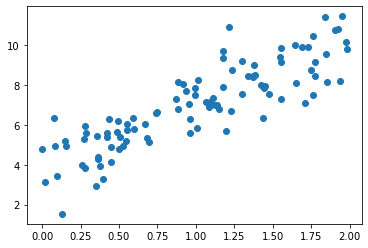

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [3]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[3.8726079 ],
       [3.14699401]])

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.8726079 ],
       [10.16659592]])

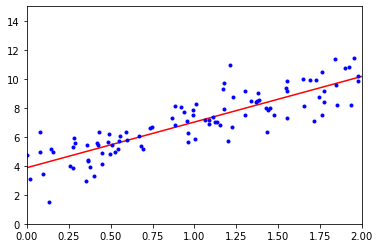

In [6]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0 ,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8726079]), array([[3.14699401]]))

In [8]:
lin_reg.predict(x_new)

array([[ 3.8726079 ],
       [10.16659592]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond = 1e-6)
theta_best_svd

array([[3.8726079 ],
       [3.14699401]])

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[3.8726079 ],
       [3.14699401]])

In [11]:
# Gradiente Descendente
eta = 0.1  #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [12]:
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[3.8726079 ],
       [3.14699401]])

In [14]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m): 
        random_index = np.random.randint(m)
        xi = x_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[3.86025571],
       [3.16186328]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80327902]), array([3.12237892]))

In [18]:
# Polynomial Regression

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x **2 + x + 2 + np.random.randn(m, 1)

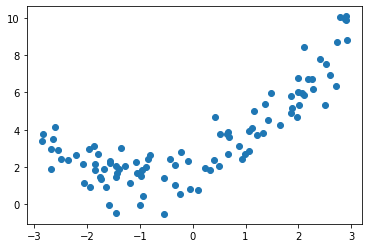

In [19]:
plt.scatter(x, y)
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)
x[0]


array([-1.38940285])

In [21]:
x_poly[0]

array([-1.38940285,  1.93044027])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98001435]), array([[0.97461168, 0.51204703]]))

In [23]:
# Learning curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")    

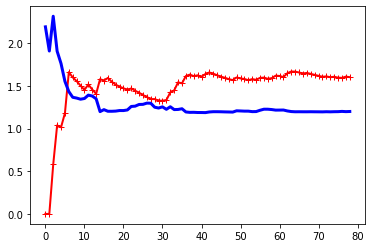

In [24]:
# exemplo das curvas do plain linear regression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

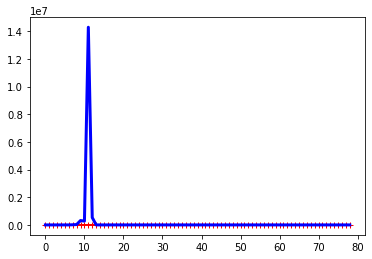

In [25]:
# exemplo 10th degree polynomial model

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree = 10, include_bias = False)), (
                                    "lin_reg", LinearRegression()), ])

plot_learning_curves(polynomial_regression, x, y)

In [26]:
# Ridge Regression

np.random.seed(42)
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_new = np.linspace(0, 3, 100).reshape(100, 1)

In [27]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.73969402]])

In [28]:
ridge_reg = Ridge(alpha = 1, solver = 'sag', random_state = 42)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.75078107]])

In [29]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([1.69442607])

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([1.72879488])

In [31]:
# Elastic Net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([1.73268344])

In [33]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

x_train, x_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [34]:
# Early Stopping
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

<h3> Logistic Regression - Iris dataset </h3>

In [35]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
x = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris Virginica, else 0

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

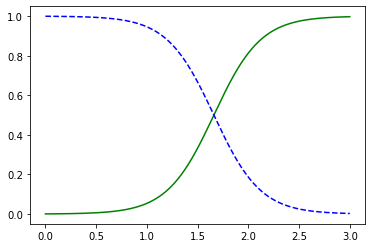

In [38]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label = "Iris Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label = "Not Iris Virginica")

In [39]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [41]:
x = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [42]:
softmax_reg.predict([[5, 2]])

array([2])

In [43]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])